<a href="https://colab.research.google.com/github/hickee032/colab_statistics/blob/main/statistics_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [34]:
import matplotlib
import matplotlib.font_manager as fm


def korean_font():

  
  plt.rc('font', family='NanumBarunGothic') # 한글 사용
  
  # fm.get_fontconfig_fonts()
  # font_location = 'C:/Windows/Fonts/NanumBarunGothic.ttf' # For Windows
  # font_name = fm.FontProperties(fname=font_location).get_name()
  # plt.rc('font', family=font_name)

  plt.rcParams['axes.unicode_minus'] = False


Text(0.5, 0, '$\\mu$')

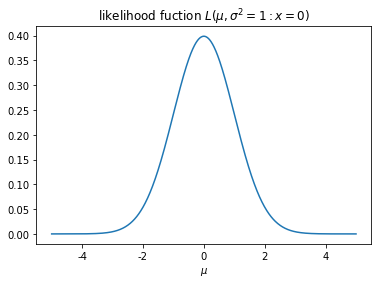

In [37]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

def likelihood_mu(mu):
  # norm().pdf(0) : 정규 분포 확률 밀도 함수
  # pdf(x) : x 범위에 따른 정규확률 밀도
  return sp.stats.norm(loc=mu).pdf(0)

korean_font()
mus = np.linspace(-5,5,1000)
like_mu = [likelihood_mu(m) for m in mus]
plt.plot(mus,like_mu)
plt.title('likelihood fuction $L(\mu,\sigma^2=1: x=0)$')
plt.xlabel('$\mu$')



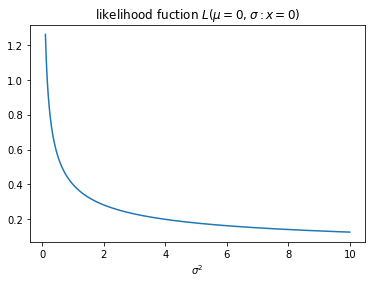

In [38]:
from numpy.core.function_base import linspace
def likelihood_sigma2(sigma2):
  return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1,10,1000) 
lile_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

korean_font()
plt.plot(sigma2s,lile_sigma2)
plt.title('likelihood fuction $L(\mu=0,\sigma: x=0)$')
plt.xlabel('$\sigma^2$')
plt.show()

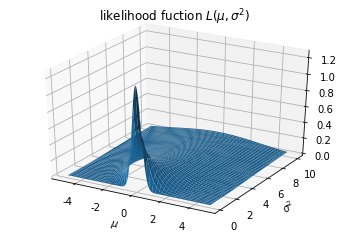

In [39]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L= np.exp(-MU**2/(2*SIGMA2)) / np.sqrt(2*np.pi*SIGMA2)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU,SIGMA2,L,linewidth = 0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('likelihood fuction $L(\mu,\sigma^2)$')
plt.show()
